### ISC CamCan Suspense

This notebook assesses the relationship between dynamic ISC and CRM data.

### setting up modules

In [1]:
import os, sys, scipy, nilearn, warnings
warnings.filterwarnings("ignore")
import numpy as np
from nilearn import plotting, input_data
from nilearn.input_data import NiftiLabelsMasker
import seaborn as sns
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from camcan_utils import *

/Users/Ralf/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### set up files

In [2]:
suspense_file         = '../data/avg_suspense.npy'
shen_dictionary_file  = '../data/shen_dictionary.npy'
shen_atlas_filename   = '../data/shen_2mm_268_parcellation.nii'
sample_file           = '../data/func.nii'
dyn_isc_file          = '../data/dyn_isc_dict.npy'

### load dynamic ISC results and reported suspense ratings

see description in notebook on sliding window analysis

In [3]:
dyn_isc_dict       = np.load(dyn_isc_file, allow_pickle=True).item() 
dyn_isc_dict.keys()
dyn_isc_result_all = dyn_isc_dict['dyn_isc_result_all']       #this is the result across the full sample

suspense = np.load(suspense_file)

### dynISC  vs CRM: Across brain regions (Figure 5A)

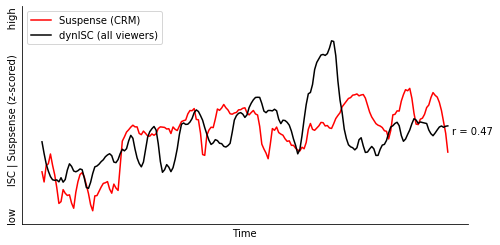

In [4]:
f   = plt.figure(figsize=(8,4))
ax1 = f.add_subplot(111)
ax1.plot(scipy.stats.zscore(suspense),   color = 'red',   label = 'Suspense (CRM)' );
ax1.plot(scipy.stats.zscore(np.nanmean(dyn_isc_result_all[:,:], axis = 1)), color = 'black', label = 'dynISC (all viewers)'   );

alignment = np.corrcoef(
                (scipy.stats.zscore(np.nanmean(dyn_isc_result_all[:,:], axis = 1)) ),
                 scipy.stats.zscore(suspense) )[0,1]

text = ('r = ' + str(np.round(alignment, 2)) )

ax1.annotate(text, xy=(194, 0))
plt.legend(loc = 0)
plt.ylim(-3, 4.3)
plt.xlabel('Time')
plt.ylabel('low       ISC | Suspsense (z-scored)        high')
plt.xticks([]);
plt.yticks([]);
sns.despine()

In [5]:
#reviewer request: exact ps
from scipy.stats import linregress
linregress(
            scipy.stats.zscore(np.nanmean(dyn_isc_result_all[:,:], axis = 1)) ,
            scipy.stats.zscore(suspense)
     )[2:4]


(0.4713932673473284, 4.541396401827977e-12)

### dynISC  vs CRM:  aMCC (Figure 5B)

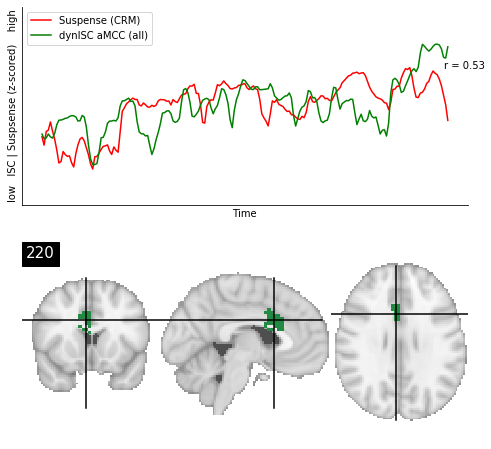

84.44% Cingulate_Gyrus_anterior_division; 11.00% Left_Lateral_Ventrical


In [6]:
curr_region = 220 
shen_dictionary = np.load(shen_dictionary_file, allow_pickle=True).item()
curr_title = shen_dictionary[curr_region + 1]['name'] 
curr_coords = shen_dictionary[curr_region + 1]['coords'] 

f = plt.figure(figsize=(8,8))
region_vector = np.zeros((1,268))
region_vector[0,curr_region] = 0.5
shen_masker = NiftiLabelsMasker(labels_img=shen_atlas_filename);
shen_masker.fit_transform(sample_file);
region_img = shen_masker.inverse_transform(region_vector);

curr_title = shen_dictionary[curr_region + 1]['name'] 
curr_coords = shen_dictionary[curr_region + 1]['coords'] 
    
ax1 = f.add_subplot(211)

ax1.plot(scipy.stats.zscore(suspense), color = 'red',   label = 'Suspense (CRM)');
ax1.plot(scipy.stats.zscore(dyn_isc_result_all[:,curr_region]),             color = 'green', label = 'dynISC aMCC (all)');

alignment = np.corrcoef(
                (scipy.stats.zscore(dyn_isc_result_all[:,curr_region]) ),
                 scipy.stats.zscore(suspense) )[0,1]

text = ('r = ' + str(np.round(alignment, 2)) )

ax1.annotate(text, xy=(190, 1.5))

plt.legend(loc = 0)
plt.ylim(-4, 4)
plt.xlabel('Time')
plt.ylabel('low   ISC | Suspsense (z-scored)    high')
plt.xticks([]);
plt.yticks([]);
sns.despine()

ax2 = f.add_subplot(212)    
nilearn.plotting.plot_stat_map(nilearn.image.index_img(region_img,0),threshold = 0.45, vmax = 1., draw_cross = True,colorbar = False,
                                       cmap = 'Greens',  annotate = False,cut_coords = curr_coords,
                                       title = str(curr_region),axes = ax2);
plt.show()
print(curr_title)

In [7]:
curr_region = 220 

linregress(
           scipy.stats.zscore(dyn_isc_result_all[:,curr_region]) ,
           scipy.stats.zscore(suspense)
      )[2:4]

(0.5329420764345075, 1.483507118368145e-15)

### dynISC  vs CRM:  LFC  (Figure 5C)

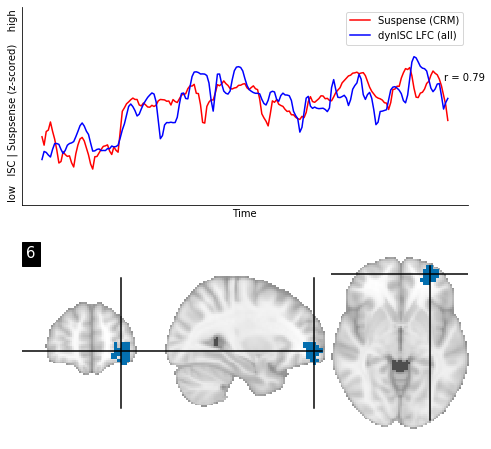

100.00% Frontal_Pole


In [8]:
curr_region = 6
shen_dictionary = np.load(shen_dictionary_file, allow_pickle=True).item()
curr_title = shen_dictionary[curr_region + 1]['name'] 
curr_coords = shen_dictionary[curr_region + 1]['coords'] 

f = plt.figure(figsize=(8,8))
region_vector = np.zeros((1,268))
region_vector[0,curr_region] = 0.5
region_img = shen_masker.inverse_transform(region_vector);

curr_title = shen_dictionary[curr_region + 1]['name'] 
curr_coords = shen_dictionary[curr_region + 1]['coords'] 
    
ax1 = f.add_subplot(211)
ax1.plot(scipy.stats.zscore(suspense), color = 'red',   label = 'Suspense (CRM)');
ax1.plot(scipy.stats.zscore(dyn_isc_result_all[:,curr_region]),             color = 'blue', label = 'dynISC LFC (all)');

alignment = np.corrcoef(
                (scipy.stats.zscore(dyn_isc_result_all[:,curr_region]) ),
                 scipy.stats.zscore(suspense) )[0,1]

text = ('r = ' + str(np.round(alignment, 2)) )

ax1.annotate(text, xy=(190, 1))

plt.legend(loc = 0)
plt.ylim(-4, 4)
plt.xlabel('Time')
plt.ylabel('low   ISC | Suspsense (z-scored)    high')
plt.xticks([]);
plt.yticks([]);
sns.despine()

ax2 = f.add_subplot(212)    
nilearn.plotting.plot_stat_map(nilearn.image.index_img(region_img,0),threshold = 0.45, vmax = 1., draw_cross = True,colorbar = False,
                                       cmap = 'PuBu',  annotate = False,cut_coords = curr_coords,
                                       title = str(curr_region),axes = ax2);
plt.show()
print(curr_title)

In [9]:
curr_region = 6

linregress(
           scipy.stats.zscore(dyn_isc_result_all[:,curr_region]) ,
           scipy.stats.zscore(suspense)
      )[2:4]

(0.7911100913639922, 1.2206134903576464e-42)

### angularis/supramarginalis

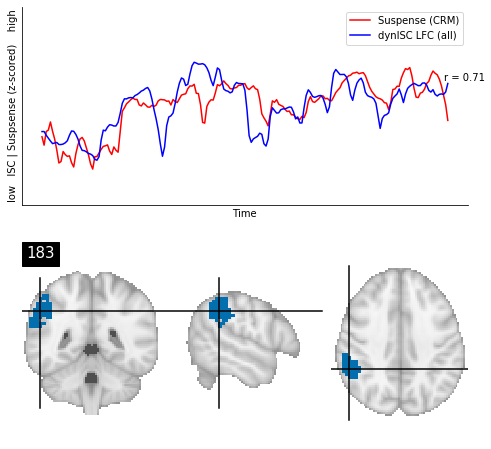

51.63% Supramarginal_Gyrus_posterior_division; 30.18% Supramarginal_Gyrus_anterior_division; 13.82% Angular_Gyrus


In [10]:
curr_region = 183
shen_dictionary = np.load(shen_dictionary_file, allow_pickle=True).item()
curr_title = shen_dictionary[curr_region + 1]['name'] 
curr_coords = shen_dictionary[curr_region + 1]['coords'] 

f = plt.figure(figsize=(8,8))
region_vector = np.zeros((1,268))
region_vector[0,curr_region] = 0.5
region_img = shen_masker.inverse_transform(region_vector);

curr_title = shen_dictionary[curr_region + 1]['name'] 
curr_coords = shen_dictionary[curr_region + 1]['coords'] 
    
ax1 = f.add_subplot(211)
ax1.plot(scipy.stats.zscore(suspense), color = 'red',   label = 'Suspense (CRM)');
ax1.plot(scipy.stats.zscore(dyn_isc_result_all[:,curr_region]),             color = 'blue', label = 'dynISC LFC (all)');

alignment = np.corrcoef(
                (scipy.stats.zscore(dyn_isc_result_all[:,curr_region]) ),
                 scipy.stats.zscore(suspense) )[0,1]

text = ('r = ' + str(np.round(alignment, 2)) )

ax1.annotate(text, xy=(190, 1))

plt.legend(loc = 0)
plt.ylim(-4, 4)
plt.xlabel('Time')
plt.ylabel('low   ISC | Suspsense (z-scored)    high')
plt.xticks([]);
plt.yticks([]);
sns.despine()

ax2 = f.add_subplot(212)    
nilearn.plotting.plot_stat_map(nilearn.image.index_img(region_img,0),threshold = 0.45, vmax = 1., draw_cross = True,colorbar = False,
                                       cmap = 'PuBu',  annotate = False,cut_coords = curr_coords,
                                       title = str(curr_region),axes = ax2);
plt.show()
print(curr_title)

In [11]:
curr_region = 183

linregress(
           scipy.stats.zscore(dyn_isc_result_all[:,curr_region]) ,
           scipy.stats.zscore(suspense)
      )[2:4]

(0.7098583776015512, 6.83041104192484e-31)

### aMCC

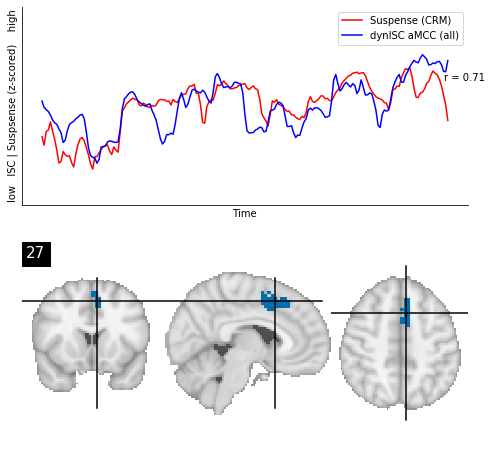

41.56% Paracingulate_Gyrus; 27.43% Superior_Frontal_Gyrus; 21.52% Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex); 9.49% Cingulate_Gyrus_anterior_division


In [12]:
curr_region = 27
shen_dictionary = np.load(shen_dictionary_file, allow_pickle=True).item()
curr_title = shen_dictionary[curr_region + 1]['name'] 
curr_coords = shen_dictionary[curr_region + 1]['coords'] 

f = plt.figure(figsize=(8,8))
region_vector = np.zeros((1,268))
region_vector[0,curr_region] = 0.5
region_img = shen_masker.inverse_transform(region_vector);

curr_title = shen_dictionary[curr_region + 1]['name'] 
curr_coords = shen_dictionary[curr_region + 1]['coords'] 
    
ax1 = f.add_subplot(211)
ax1.plot(scipy.stats.zscore(suspense), color = 'red',   label = 'Suspense (CRM)');
ax1.plot(scipy.stats.zscore(dyn_isc_result_all[:,curr_region]),             color = 'blue', label = 'dynISC aMCC (all)');

alignment = np.corrcoef(
                (scipy.stats.zscore(dyn_isc_result_all[:,curr_region]) ),
                 scipy.stats.zscore(suspense) )[0,1]

text = ('r = ' + str(np.round(alignment, 2)) )

ax1.annotate(text, xy=(190, 1))

plt.legend(loc = 0)
plt.ylim(-4, 4)
plt.xlabel('Time')
plt.ylabel('low   ISC | Suspsense (z-scored)    high')
plt.xticks([]);
plt.yticks([]);
sns.despine()

ax2 = f.add_subplot(212)    
nilearn.plotting.plot_stat_map(nilearn.image.index_img(region_img,0),threshold = 0.45, vmax = 1., draw_cross = True,colorbar = False,
                                       cmap = 'PuBu',  annotate = False,cut_coords = curr_coords,
                                       title = str(curr_region),axes = ax2);
plt.show()
print(curr_title)

In [13]:
curr_region = 27

linregress(
           scipy.stats.zscore(dyn_isc_result_all[:,curr_region]) ,
           scipy.stats.zscore(suspense)
      )[2:4]

(0.7055409382428599, 2.212108744854504e-30)

### expand the analysis to all regions (Figure 5D)

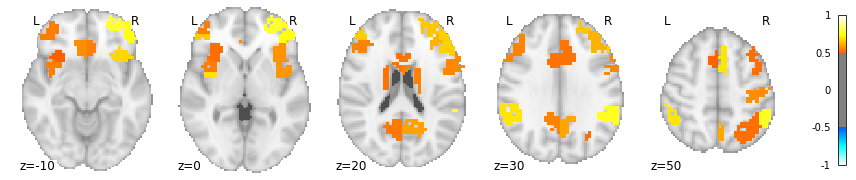

In [14]:
n_regions = dyn_isc_result_all.shape[1]
isc_2_crm = np.zeros((1,n_regions))
for curr_region in range(n_regions):
    isc_2_crm[0,curr_region] = np.corrcoef(dyn_isc_result_all[:, curr_region], suspense)[0,1]

isc_2_crm_img = shen_masker.inverse_transform(isc_2_crm);
nilearn.plotting.plot_stat_map(nilearn.image.index_img(isc_2_crm_img,0),
                               resampling_interpolation = 'linear',
                               threshold = 0.5,
                               vmax = 1,
                               display_mode = 'z',
                               cut_coords = [ -10, 0 , 20,  30, 50],
                               #title = "Relationship between regional dynISC and reported suspense",
                              );


In [15]:
# uncomment if you wish interactive plotting
view = nilearn.plotting.view_img(nilearn.image.index_img(isc_2_crm_img,0) ,
                                resampling_interpolation = 'linear',
                                threshold = 0.5);
view